# Deep Learning


In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 32.7 MB/s 
     |████████████████████████████████| 1.2 MB 63.6 MB/s 
     |████████████████████████████████| 189 kB 77.3 MB/s 
     |████████████████████████████████| 46 kB 6.0 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 51 kB 436 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

## Your First Model

### Running Your First Notebook

In [3]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.178006,0.018986,0.006089,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.053489,0.010229,0.005413,00:56


### Sidebar: This Book Was Written in Jupyter Notebooks

Jupyter will always print or show the result of the last line (if there is one). For instance, here is an example of a cell that outputs an image:

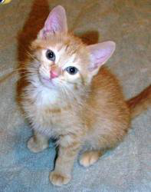

In [4]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [5]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" id="upload" src="https://github.com/fastai/fastbook/blob/master/images/att_00008.png?raw=1">

In [6]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [12]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

FileNotFoundError: ignored

### What Is Machine Learning?

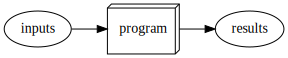

In [9]:
#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

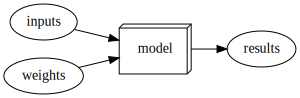

In [10]:
#hide_input
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

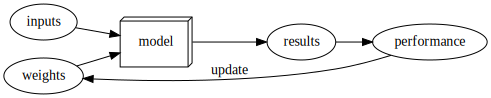

In [11]:
#hide_input
#caption Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

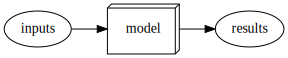

In [13]:
#hide_input
#caption Using a trained model as a program
#id using_model
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### A Bit of Deep Learning Jargon

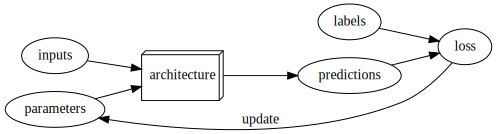

In [14]:
#hide_input
#caption Detailed training loop
#id detailed_loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

## Deep Learning Is Not Just for Image Classification

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.725641,2.307826,00:02


epoch,train_loss,valid_loss,time
0,1.677123,1.442676,00:02
1,1.479455,1.149806,00:02
2,1.334347,1.075957,00:02
3,1.220413,1.054155,00:02
4,1.106476,0.786549,00:02
5,0.999874,0.756771,00:02
6,0.913789,0.730315,00:02
7,0.846653,0.725248,00:02


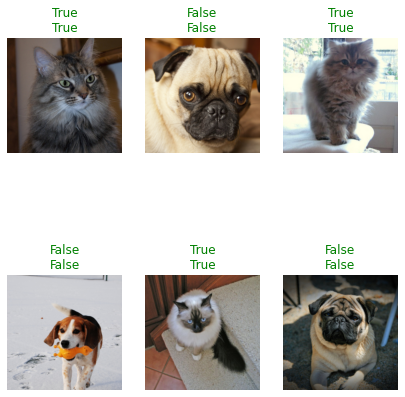

In [15]:
learn.show_results(max_n=6, figsize=(7,8))

In [16]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.460298,0.392935,0.824960,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.305022,0.264450,0.892760,07:11
1,0.243845,0.205977,0.919600,07:13
2,0.181909,0.197324,0.925720,07:13
3,0.151238,0.196352,0.926960,07:15


In [17]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([4.1472e-05, 9.9996e-01]))

### Sidebar: The Order Matters

### End sidebar

In [18]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [19]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.385693,0.368736,0.823403,00:04
1,0.362720,0.360360,0.835688,00:04
2,0.349836,0.355616,0.834920,00:04


In [20]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.503072,1.422399,00:00


epoch,train_loss,valid_loss,time
0,1.371748,1.365172,00:00
1,1.270863,1.192727,00:00
2,1.021317,0.895202,00:00
3,0.795334,0.768471,00:00
4,0.682336,0.738592,00:00
5,0.632993,0.728512,00:00
6,0.625118,0.725419,00:00
7,0.602432,0.722509,00:00
8,0.599779,0.721879,00:00
9,0.601366,0.721734,00:00


In [21]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,99.0,26.0,3.5,4.129075
1,10.0,42.0,5.0,3.486425
2,65.0,7.0,4.0,4.457643
3,79.0,66.0,4.5,4.330992
4,68.0,93.0,3.0,4.083593
5,30.0,39.0,4.0,4.254503
6,16.0,67.0,3.0,3.944094
7,42.0,80.0,4.0,3.633759
8,74.0,18.0,5.0,4.503977
